In [42]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind, chi2_contingency, levene, ks_2samp, wilcoxon

# p_vals = "/Users/dterciano/Desktop/LokeyLabFiles/TargetMol/auc-roc_research/auc and MOAST comparison/p_val_comparison.csv"
p_vals = "/mnt/c/Users/derfelt/Desktop/LokeyLabFiles/TargetMol/auc-roc_research/auc and MOAST comparison/p_val_comparison.csv"
p_vals = pd.read_csv(p_vals, index_col=0)

# auc_roc = "/Users/dterciano/Desktop/LokeyLabFiles/TargetMol/auc-roc_research/FINAL_auc_roc_analysis/no_cp_filtering/TM_1-27_1+10_full_0.8_horiztacked.csv"
auc_roc = "/mnt/c/Users/derfelt/Desktop/LokeyLabFiles/TargetMol/auc-roc_research/FINAL_auc_roc_analysis/no_cp_filtering/TM_1-27_1+10_full_0.8_horiztacked.csv"
auc_roc = pd.read_csv(auc_roc, index_col=0)

display(p_vals, auc_roc)

,p-vals,adjusted p-vals
held_class,,
5-HT,0.341011,0.400205
5-alpha_reductase,0.052260,0.122202
ABC,0.000000,0.000000
ACE,0.203589,0.291780
AChE,0.321966,0.385018
...,...,...
ionotropic_glutamate_receptor,0.122799,0.223337
lysophospholipase_1,0.007910,0.039289
mGluR,0.425928,0.463159


,AUC-ROC score,raw p-value,adjusted p-value,num members in clas
class,,,,
Methionine_aminopeptidase_2,0.990913,0.000999,0.005939,4
Alcohol_dehydrogenase,0.981813,0.000999,0.005939,4
Na+/K+_ATPase,0.980183,0.000999,0.005939,22
Exportin-1_(CRM1),0.978402,0.000999,0.005939,6
Wee1,0.965367,0.000999,0.005939,4
...,...,...,...,...
AChR,0.508553,0.524476,0.575578,323
Carnitine,0.498420,0.935065,0.937255,13
Immunology/Inflammation_related,0.493508,0.959041,0.959041,14


In [23]:
merge_df = pd.merge(left=auc_roc, right=p_vals, left_index=True, right_index=True, how='right')
merge_df = merge_df[['adjusted p-value', 'adjusted p-vals']]
merge_df.rename(columns={'adjusted p-value': 'auc-roc adj p-vals', 'adjusted p-vals': 'MOAST adjusted p-vals'}, inplace=True)
print(merge_df.shape)

log10_merge = pd.DataFrame(-np.log10(merge_df.values), columns=merge_df.columns)

(311, 2)


/tmp/ipykernel_27749/1662649316.py:6: RuntimeWarning: divide by zero encountered in log10
  log10_merge = pd.DataFrame(-np.log10(merge_df.values), columns=merge_df.columns)


# Visual plots

Text(0.5, 0, '-log10 p-values (vals right of the line are more significant)')

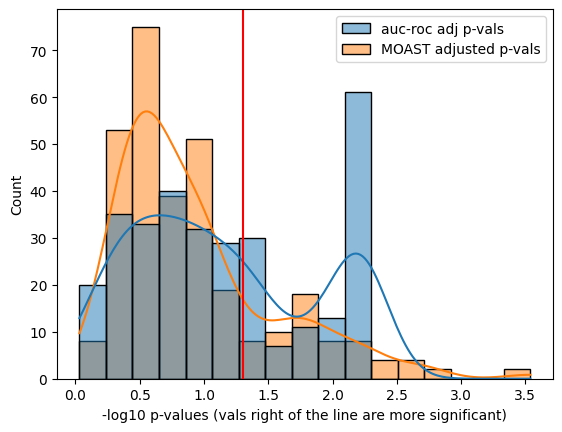

In [31]:
# sns.kdeplot(data=merge_df)
sig_thresh = 0.05

fig, ax = plt.subplots()
sns.histplot(data=log10_merge, kde=True, ax=ax)
# sns.histplot(data=merge_df[(merge_df['auc-roc adj p-vals'] <= sig_thresh) & (merge_df['MOAST adjusted p-vals'] <= sig_thresh)], kde=True, ax=ax)
ax.axvline(x=-np.log10(sig_thresh), color='r')
ax.set_xlabel("-log10 p-values (vals right of the line are more significant)")

Text(0, 0.5, '-log10 p-values (vals above line are more significant)')

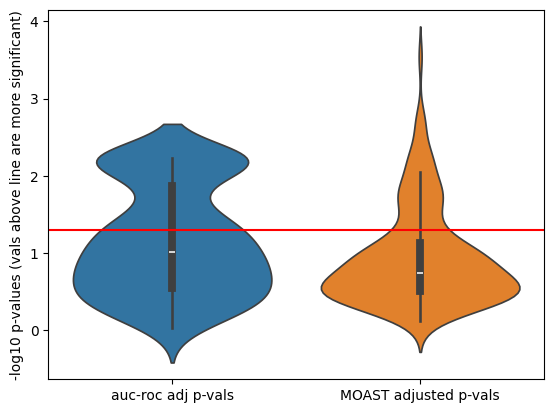

In [34]:
fig, ax = plt.subplots()
sns.violinplot(log10_merge, ax=ax)
ax.axhline(-np.log10(sig_thresh), color='r')
ax.set_ylabel('-log10 p-values (vals above line are more significant)')

# statistical tests

In [47]:
# medians
print(f"Median of p-values")
print(merge_df.median())
print("\nMean of p-values")
print(merge_df.mean())

#KS test
ks_stat, p_value_ks = ks_2samp(merge_df['auc-roc adj p-vals'].values, merge_df['MOAST adjusted p-vals'].values)
print(f"\n(KS test) KS_stat: {ks_stat}, p_value: {p_value_ks}")

# Wilcox Signed-rank test
stat, p_value_wilcox = wilcoxon(merge_df['auc-roc adj p-vals'].values, merge_df['MOAST adjusted p-vals'].values)
print(f'(Wilcox Signed-rank test) Wilcoxon test statistic: {stat}, P-value: {p_value_wilcox}')

#mann whitney u
u_stat, p_value = mannwhitneyu(merge_df['auc-roc adj p-vals'].values, merge_df['MOAST adjusted p-vals'].values)
print(f"(mann whitney u) U stat: {u_stat}, P-val: {p_value}")

Median of p-values
auc-roc adj p-vals       0.096996
MOAST adjusted p-vals    0.178119
dtype: float64

Mean of p-values
auc-roc adj p-vals       0.180794
MOAST adjusted p-vals    0.209210
dtype: float64

(KS test) KS_stat: 0.21221864951768488, p_value: 1.519175574004007e-06
(Wilcox Signed-rank test) Wilcoxon test statistic: 19734.0, P-value: 0.0043645376605728125
(mann whitney u) U stat: 39870.0, P-val: 0.00015030655889259055
